# 學生飲酒狀況 (Student alcohol consumption)

index introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 50)
fname = "Student Alcohol Consumption.csv"
df = pd.read_csv(fname)
columnsA = df.columns
columnsB = ["學校", "性別", "年齡", "居住區（都市或郊區）", "家庭規模", "父母同居狀況（同居或分居）", "母親教育程度", "父親教育程度", "母親工作", "父親工作", "原因", "監護人", "家庭到學校的路程", "每週學習時間", "過去不及格次數", "課外輔導", "家庭協助教育", "付費課程", "課外活動", "是否有讀幼兒園", "是否接受高等教育", "是否在家上網", "情侶關係", "家庭關係", "放學休閒時間", "與朋友外出的經常性", "工作日飲酒量", "周末飲酒量", "健康狀態", "出席情況", "第一階段成績", "第二階段成績", "期末成績"]
columnsC = ["'GP'  or  'MS'", "'F' or 'M'", "from 15 to 22", "'U' or 'R'", "'LE3' or 'GT3'", "'T' or 'A'", "from 0 to 4", "from 0 to 4", "'teacher', 'health', 'services', 'at_home' or 'other'", "'teacher', 'health', 'services', 'at_home' or 'other'", "'home', 'reputation', 'course' or 'other'", "'mother', 'father' or 'other'", "from 1 to 4", "from 1 to 4", "If 1<=n<3 , n, else 4", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "from 1 to 5", "from 1 to 5", "from 1 to 5", "from 1 to 5", "from 1 to 5", "from 1 to 5", "from 0 to 93", "from 0 to 20", "from 0 to 20", "from 0 to 20"]
df_introduce = pd.DataFrame(columns=columnsB)
df_introduce.loc[0] = columnsA
df_introduce.loc[1] = columnsC
df_introduce

,學校,性別,年齡,居住區（都市或郊區）,家庭規模,父母同居狀況（同居或分居）,母親教育程度,父親教育程度,母親工作,父親工作,原因,監護人,家庭到學校的路程,每週學習時間,過去不及格次數,課外輔導,家庭協助教育,付費課程,課外活動,是否有讀幼兒園,是否接受高等教育,是否在家上網,情侶關係,家庭關係,放學休閒時間,與朋友外出的經常性,工作日飲酒量,周末飲酒量,健康狀態,出席情況,第一階段成績,第二階段成績,期末成績
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,'GP' or 'MS','F' or 'M',from 15 to 22,'U' or 'R','LE3' or 'GT3','T' or 'A',from 0 to 4,from 0 to 4,"'teacher', 'health', 'services', 'at_home' or ...","'teacher', 'health', 'services', 'at_home' or ...","'home', 'reputation', 'course' or 'other'","'mother', 'father' or 'other'",from 1 to 4,from 1 to 4,"If 1<=n<3 , n, else 4",'yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no',from 1 to 5,from 1 to 5,from 1 to 5,from 1 to 5,from 1 to 5,from 1 to 5,from 0 to 93,from 0 to 20,from 0 to 20,from 0 to 20


In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


### What is the relationship between alcohol consumption and grades?

In [4]:
df["Alc"] = df["Dalc"] + df["Walc"]
df['Alc'].describe()

count    649.000000
mean       3.782743
std        1.992411
min        2.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: Alc, dtype: float64

In [5]:
df["G1Z"] = df["G1"].apply(lambda x: (x - df["G1"].mean()) / df["G1"].std())
df["G2Z"] = df["G2"].apply(lambda x: (x - df["G2"].mean()) / df["G2"].std())
df["G3Z"] = df["G3"].apply(lambda x: (x - df["G3"].mean()) / df["G3"].std())

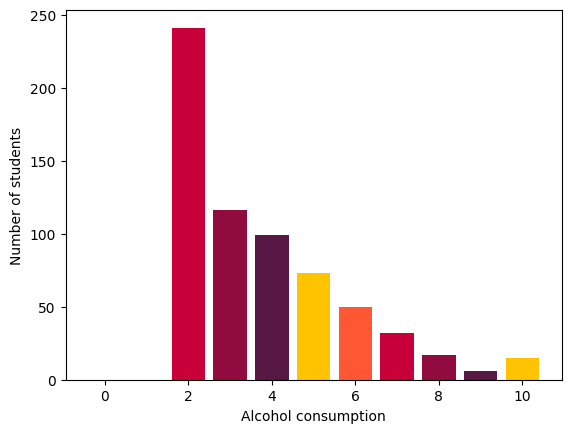

In [6]:
# Illustrate the total number of people who drink alcohol per week
totalst = []
for i in range(df["Alc"].max() + 1):
    totalst.append(len(df[df["Alc"] == i]))
plt.bar(range(df["Alc"].max() + 1), totalst, color=['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845'])
plt.xlabel("Alcohol consumption")
plt.ylabel("Number of students")
plt.show()

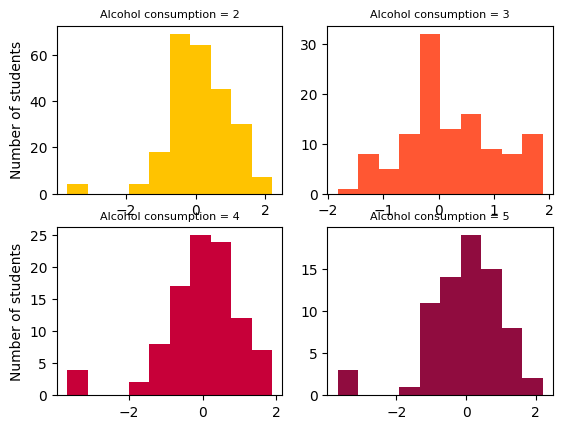

In [7]:
plt.subplot(2, 2, 1)
plt.hist(df[df["Alc"] == 2]["G3Z"], color='#FFC300')
plt.title("Alcohol consumption = 2", fontsize=8)
plt.ylabel("Number of students")
plt.subplot(2, 2, 2)
plt.hist(df[df["Alc"] == 3]["G3Z"], color='#FF5733')
plt.title("Alcohol consumption = 3", fontsize=8)
plt.subplot(2, 2, 3)
plt.hist(df[df["Alc"] == 4]["G3Z"], color='#C70039')
plt.title("Alcohol consumption = 4", fontsize=8)
plt.ylabel("Number of students")
plt.subplot(2, 2, 4)
plt.hist(df[df["Alc"] == 5]["G3Z"], color='#900C3F')
plt.title("Alcohol consumption = 5", fontsize=8)
plt.show()

          Alc       G1Z       G2Z       G3Z
Alc  1.000000 -0.190931 -0.194222 -0.208881
G1Z -0.190931  1.000000  0.864982  0.826387
G2Z -0.194222  0.864982  1.000000  0.918548
G3Z -0.208881  0.826387  0.918548  1.000000


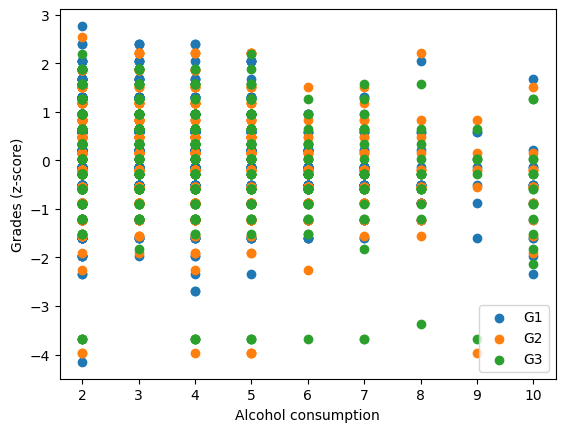

In [8]:
# Explain the correlation between alcohol and grades
print(df[["Alc", "G1Z", "G2Z", "G3Z"]].corr())
plt.scatter(df["Alc"], df["G1Z"], label="G1")
plt.scatter(df["Alc"], df["G2Z"], label="G2")
plt.scatter(df["Alc"], df["G3Z"], label="G3")
plt.xlabel("Alcohol consumption")
plt.ylabel("Grades (z-score)")
plt.legend()
plt.show()

### What is the relationship about other factors?

In [9]:
#PS
# import seaborn as sns

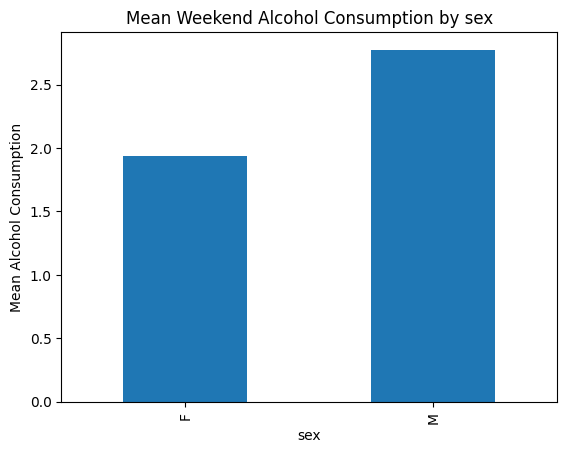

In [10]:
sex = df.groupby('sex')['Walc'].mean()
sex.plot(kind='bar', title='Mean Weekend Alcohol Consumption by sex')
plt.ylabel('Mean Alcohol Consumption')
plt.show()

famsize  Pstatus
GT3      A          3.575758
         T          3.955189
LE3      A          3.957447
         T          3.931034
Name: famrel, dtype: float64


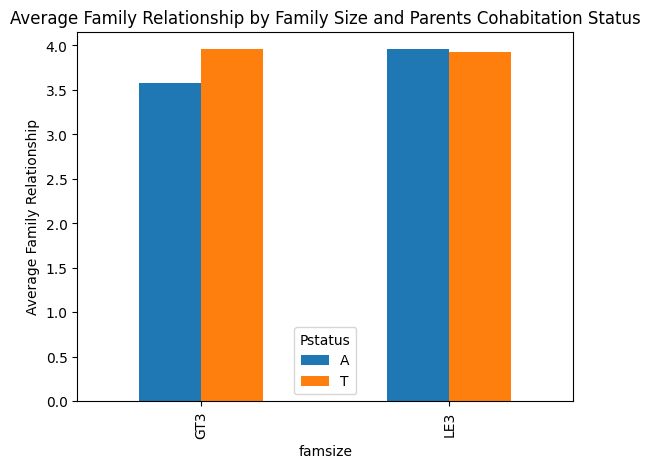

In [11]:
famrel = df.groupby(['famsize', 'Pstatus'])['famrel'].mean()
print(famrel)
famrel.unstack().plot(kind='bar', title='Average Family Relationship by Family Size and Parents Cohabitation Status')
plt.ylabel('Average Family Relationship')
plt.show()

activities   no  yes
romantic            
no          220  190
yes         114  125


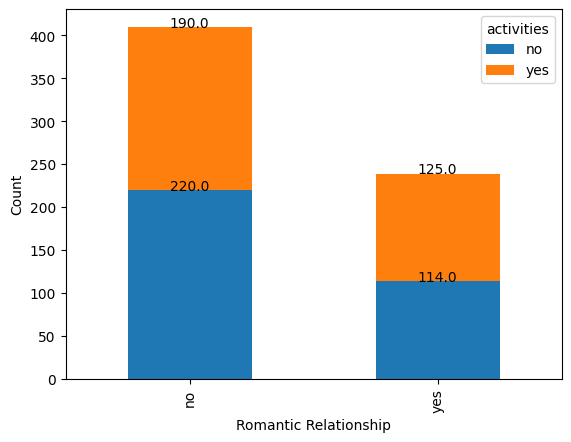

In [12]:
#romantic - with a romantic relationship (binary: yes or no)
#activities - extra-curricular activities (binary: yes or no)

# 交叉比對
cross_tab = pd.crosstab(df["romantic"], df["activities"])
print(cross_tab)

# 製作堆疊長條圖
bar = cross_tab.plot(kind='bar', stacked=True)

# 製作數值添加在長條圖
for a in bar.patches:
    width, height = a.get_width(), a.get_height()
    #這是得到每個圖表左上角的座標位置
    x, y = a.get_xy()
    #annotate用於在圖表上添加文本標籤
    bar.annotate(height, (x + width/2, y + height), ha='center')

# 設定 x 和 y 軸標籤
plt.xlabel('Romantic Relationship')
plt.ylabel('Count')
plt.show()

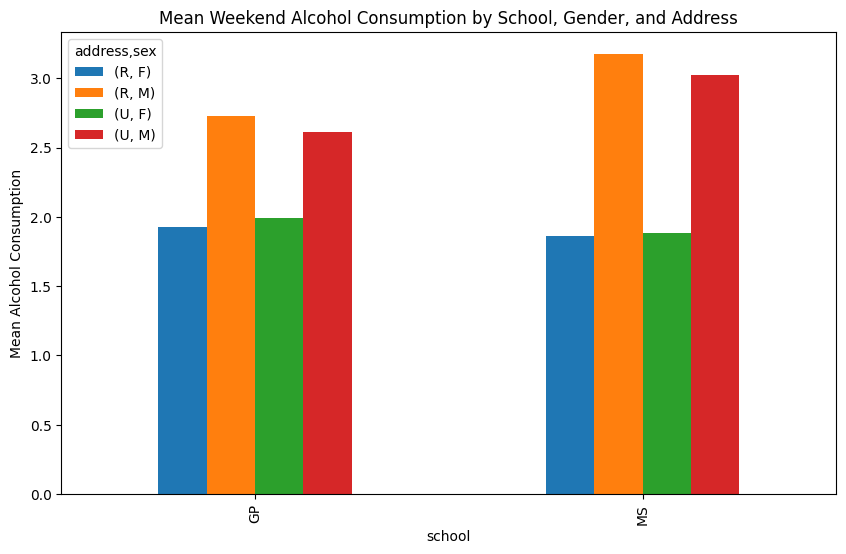

In [13]:
alcohol3 = df.groupby(['school', 'sex', 'address'])['Walc'].mean().unstack().unstack()
alcohol3.plot(kind='bar', figsize=(10,6), title='Mean Weekend Alcohol Consumption by School, Gender, and Address')
plt.ylabel('Mean Alcohol Consumption')
plt.show()
#PE

### What is the relationship between alcohol consumption and other factors?

activities   no  yes
romantic            
no          220  190
yes         114  125


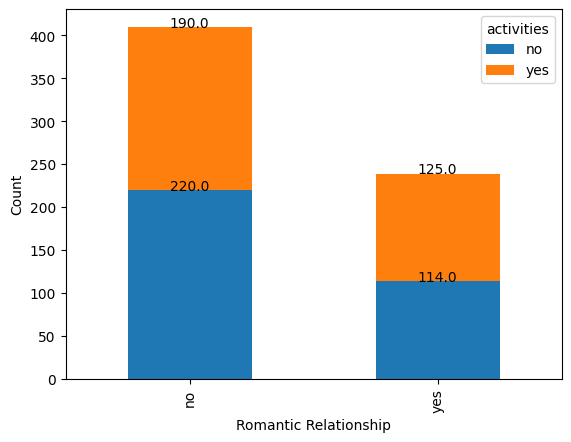

In [14]:
#romantic - with a romantic relationship (binary: yes or no)
#activities - extra-curricular activities (binary: yes or no)

# 交叉比對
cross_tab = pd.crosstab(df["romantic"], df["activities"])
print(cross_tab)

# 製作堆疊長條圖
bar = cross_tab.plot(kind='bar', stacked=True)

# 製作數值添加在長條圖
for a in bar.patches:
    width, height = a.get_width(), a.get_height()
    #這是得到每個圖表左上角的座標位置
    x, y = a.get_xy()
    #annotate用於在圖表上添加文本標籤
    bar.annotate(height, (x + width/2, y + height), ha='center')

# 設定 x 和 y 軸標籤
plt.xlabel('Romantic Relationship')
plt.ylabel('Count')
plt.show()

有戀愛關係也有課外活動的平均酒精消費量： 4.032 
 有戀愛關係但沒有課外活動的平均酒精消費量： 3.596 
 沒有戀愛關係但有課外活動的平均酒精消費量： 3.726 
 沒有戀愛關係也沒有課外活動的平均酒精消費量： 3.786


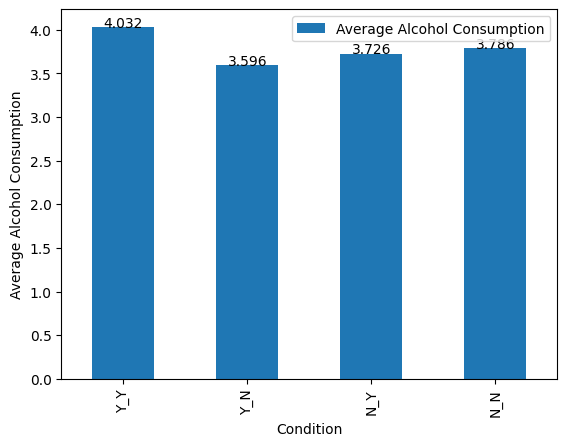

In [15]:
romantic_and_activities = df[(df["romantic"] == "yes") & (df["activities"] == "yes")]
romantic_and_no_activities = df[(df["romantic"] == "yes") & (df["activities"] == "no")]
no_romantic_and_activities = df[(df["romantic"] == "no") & (df["activities"] == "yes")]
no_romantic_and_no_activities = df[(df["romantic"] == "no") & (df["activities"] == "no")]

mean_romantic_and_activities = romantic_and_activities["Alc"].mean().round(3)
mean_romantic_and_no_activities = romantic_and_no_activities["Alc"].mean().round(3)
mean_no_romantic_and_activities = no_romantic_and_activities["Alc"].mean().round(3)
mean_no_romantic_and_no_activities = no_romantic_and_no_activities["Alc"].mean().round(3)

# 創建比較表
compare_tab = pd.DataFrame({
    "Condition": ["With Romantic Relationship and Extracurricular Activities", "With Romantic Relationship but No Extracurricular Activities", "No Romantic Relationship but With Extracurricular Activities", "No Romantic Relationship and No Extracurricular Activities"],
    "Average Alcohol Consumption": [mean_romantic_and_activities, mean_romantic_and_no_activities, mean_no_romantic_and_activities, mean_no_romantic_and_no_activities]
})
# Create the bar plot

print("有戀愛關係也有課外活動的平均酒精消費量：",mean_romantic_and_activities,"\n",
      "有戀愛關係但沒有課外活動的平均酒精消費量：",mean_romantic_and_no_activities,"\n",
      "沒有戀愛關係但有課外活動的平均酒精消費量：",mean_no_romantic_and_activities,"\n",
      "沒有戀愛關係也沒有課外活動的平均酒精消費量：",mean_no_romantic_and_no_activities)

bar2 = compare_tab.plot(kind='bar')

for a in bar2.patches:
    width, height = a.get_width(), a.get_height()
    x, y = a.get_xy()
    plt.text(x + width/2, y + height, height , ha='center')

plt.xlabel('Condition')
plt.ylabel('Average Alcohol Consumption')
plt.xticks(range(4), ["Y_Y", "Y_N", "N_Y", "N_N"])
plt.legend()

paid        no  yes
schoolsup          
no         548   33
yes         62    6


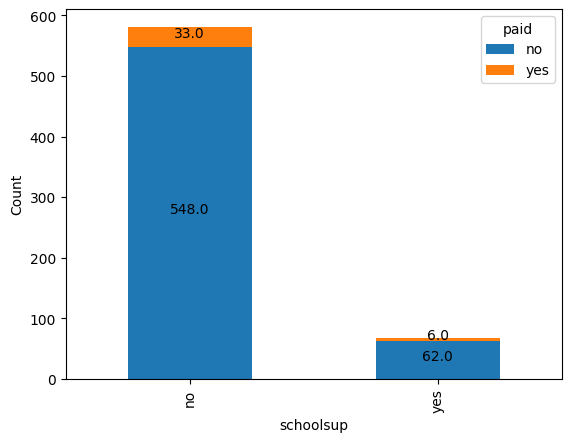

In [16]:
#schoolsup - extra educational support (binary: yes or no)
#paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

# 交叉比對
cross_tab = pd.crosstab(df["schoolsup"], df["paid"])
print(cross_tab)

# 製作堆疊長條圖
bar = cross_tab.plot(kind='bar', stacked=True)

# 製作數值添加在長條圖
for a in bar.patches:
    width, height = a.get_width(), a.get_height()
    #這是得到每個圖表左上角的座標位置
    x, y = a.get_xy()
    #annotate用於在圖表上添加文本標籤
    bar.annotate(height, (x + width/2, y + height*0.5), ha='center')
# 設定 x 和 y 軸標籤
plt.xlabel('schoolsup')
plt.ylabel('Count')
plt.show()

有額外的教育支持同時也有額外付費課程的平均酒精消費量： 2.0 
 有額外的教育支持但沒有額外付費課程的平均酒精消費量： 3.468 
 沒有額外的教育支持但有額外付費課程的平均酒精消費量： 4.545 
 沒有額外的教育支持也沒有額外付費課程的平均酒精消費量： 3.792


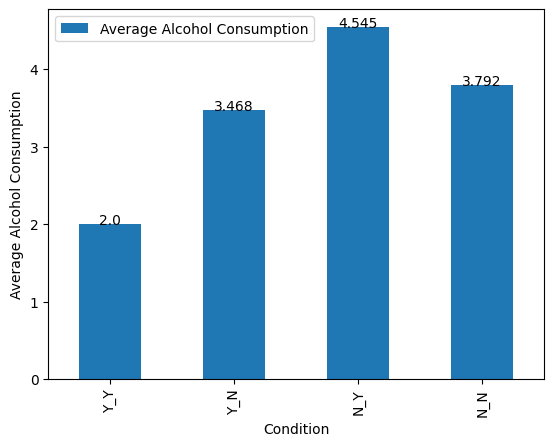

In [17]:
schoolsup_and_paid = df[(df["schoolsup"] == "yes") & (df["paid"] == "yes")]
schoolsup_and_no_paid = df[(df["schoolsup"] == "yes") & (df["paid"] == "no")]
no_schoolsup_and_paid = df[(df["schoolsup"] == "no") & (df["paid"] == "yes")]
no_schoolsup_and_no_paid = df[(df["schoolsup"] == "no") & (df["paid"] == "no")]

mean_schoolsup_and_paid = schoolsup_and_paid["Alc"].mean().round(3)
mean_schoolsup_and_no_paid = schoolsup_and_no_paid["Alc"].mean().round(3)
mean_no_schoolsup_and_paid = no_schoolsup_and_paid["Alc"].mean().round(3)
mean_no_schoolsup_and_no_paid = no_schoolsup_and_no_paid["Alc"].mean().round(3)

print("有額外的教育支持同時也有額外付費課程的平均酒精消費量：",mean_schoolsup_and_paid,"\n",
      "有額外的教育支持但沒有額外付費課程的平均酒精消費量：",mean_schoolsup_and_no_paid,"\n",
      "沒有額外的教育支持但有額外付費課程的平均酒精消費量：",mean_no_schoolsup_and_paid,"\n",
      "沒有額外的教育支持也沒有額外付費課程的平均酒精消費量：",mean_no_schoolsup_and_no_paid)

# 創建比較表
compare_tab = pd.DataFrame({
    "Condition": ["With schoolsup and paid", "With schoolsup but No Extracurricular Activities", "No schoolsup but With Extracurricular Activities", "No schoolsup and No Paid"],
    "Average Alcohol Consumption": [mean_schoolsup_and_paid, mean_schoolsup_and_no_paid, mean_no_schoolsup_and_paid, mean_no_schoolsup_and_no_paid]
})

bar2 = compare_tab.plot(kind='bar')

for a in bar2.patches:
    width, height = a.get_width(), a.get_height()
    x, y = a.get_xy()
    plt.text(x + width/2, y + height, height , ha='center')

plt.xlabel('Condition')
plt.ylabel('Average Alcohol Consumption')
plt.xticks(range(4), ["Y_Y", "Y_N", "N_Y", "N_N"])
plt.legend()
plt.show()

### What is the relationship between the number of alcohol consumption and the number of go out? What is the relationship between the number of alcohol consumption and the number of absences?

            Alc     goout
Alc    1.000000  0.364339
goout  0.364339  1.000000


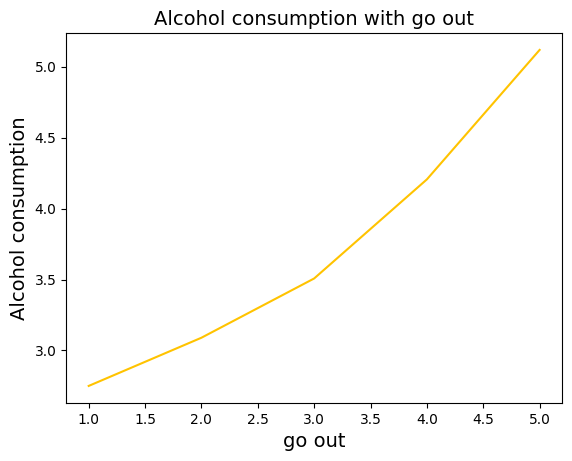

In [18]:
import matplotlib.ticker as ticker
df["Alc"] = df["Dalc"] + df["Walc"]
# 統計飲酒狀況與和朋友出門的頻率的相關性
print(df[["Alc", "goout"]].corr())
plt.plot(df[["Alc", "goout"]].groupby('goout').mean(), color='#FFC300')
plt.title("Alcohol consumption with go out", fontsize=14)
plt.ylabel("Alcohol consumption", fontsize=14)
plt.xlabel("go out", fontsize=14)
plt.show()

              Dalc  absences
Dalc      1.000000  0.172952
absences  0.172952  1.000000


<Axes: xlabel='Dalc'>

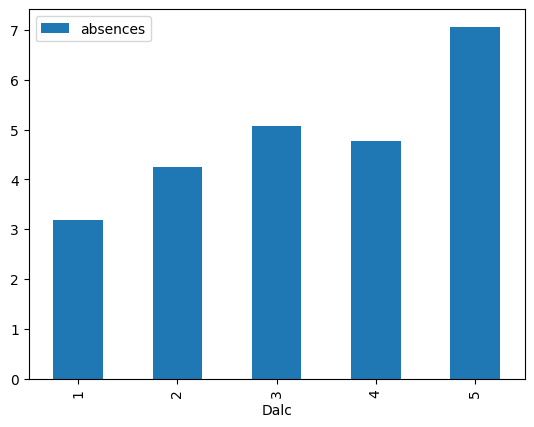

In [19]:
print(df[["Dalc", "absences"]].corr())
df[["Dalc", "absences"]].groupby('Dalc').mean().plot(kind='bar')

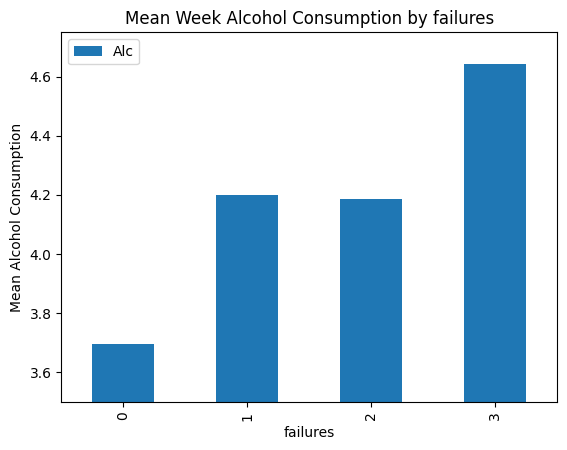

/tmp/ipykernel_292771/139467703.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score = df[["Dalc", "score"]].groupby('score').mean()


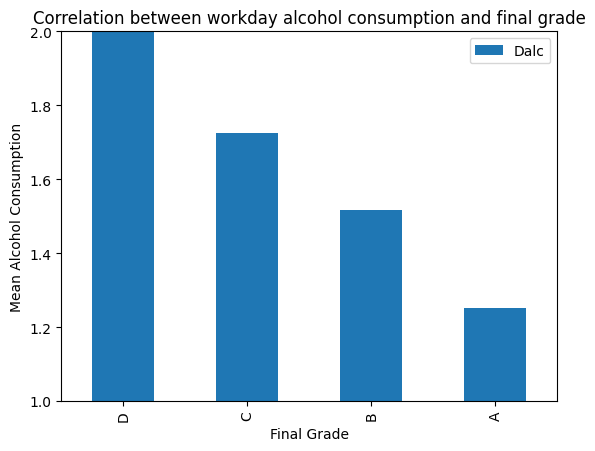

               Alc  failures
Alc       1.000000  0.102211
failures  0.102211  1.000000
          Dalc        G3
Dalc  1.000000 -0.204719
G3   -0.204719  1.000000


In [20]:
df[["Alc", "failures"]].groupby('failures').mean().plot(kind='bar')
failures = df.groupby('failures')['Dalc'].mean()
failures.plot(kind='bar', title='Mean Week Alcohol Consumption by failures')
plt.ylabel('Mean Alcohol Consumption')
plt.ylim(3.5,4.75)
plt.show()
bins = [0,5,10,15,20]
# 設定分數級距表示
labels = ["D","C","B","A"]
df['score'] = pd.cut(df['G3'],bins, right=False,labels=labels)
score = df[["Dalc", "score"]].groupby('score').mean()
score.plot(kind='bar', title='Correlation between workday alcohol consumption and final grade')
plt.ylabel('Mean Alcohol Consumption')
plt.xlabel('Final Grade')
plt.ylim(1,2)
plt.show()
print(df[["Alc", "failures"]].corr())
print(df[["Dalc", "G3"]].corr())

### So don't drink too much alcohol.

### What is the relationship between alcohol consumption and live address after filtering out parental education?

In [21]:
#教育程度低且父母同居的情況下，城市和鄉村的學生，誰比較容易酗酒

df["Alc"] = df["Dalc"] + df["Walc"] #整周的喝酒量
selected_columns = ['sex', 'address', 'Pstatus','Medu', 'Fedu',"Mjob","Fjob","Alc","higher"] #取出要比對的資料
Medu_means = df["Medu"].mean() #爸爸教育程度平均值
Fedu_means = df["Fedu"].mean() #媽媽教育程度平均值

#選出爸爸和媽媽教育水平都低於平均且同居的家庭
selected_data = df[(df['Medu'] < Medu_means) & (df['Fedu'] < Fedu_means) & (df['Pstatus'] == "T")][selected_columns]
selected_data

,sex,address,Pstatus,Medu,Fedu,Mjob,Fjob,Alc,higher
1,F,U,T,1,1,at_home,other,2,yes
2,F,U,T,1,1,at_home,other,5,yes
6,M,U,T,2,2,other,other,2,yes
11,F,U,T,2,1,services,other,2,yes
23,M,U,T,2,2,other,other,6,yes
...,...,...,...,...,...,...,...,...,...
632,F,R,T,1,1,at_home,other,2,yes
637,M,R,T,2,1,other,other,4,yes
639,M,R,T,1,1,other,services,4,yes
641,F,R,T,2,2,at_home,other,4,yes


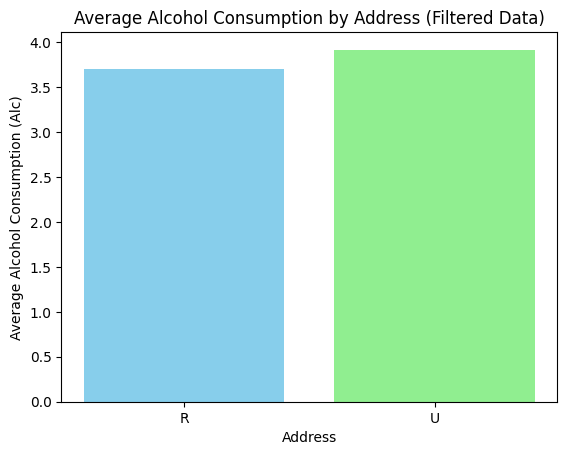

In [22]:
# 計算城市和鄉村兩組的飲酒量平均值
grouped_data = selected_data.groupby('address')['Alc'].mean()

# 鄉村和城市飲酒量平均比較長條圖
plt.bar(grouped_data.index, grouped_data.values, color=['skyblue', 'lightgreen'])
plt.xlabel('Address')
plt.ylabel('Average Alcohol Consumption (Alc)')
plt.title('Average Alcohol Consumption by Address (Filtered Data)')
plt.show()

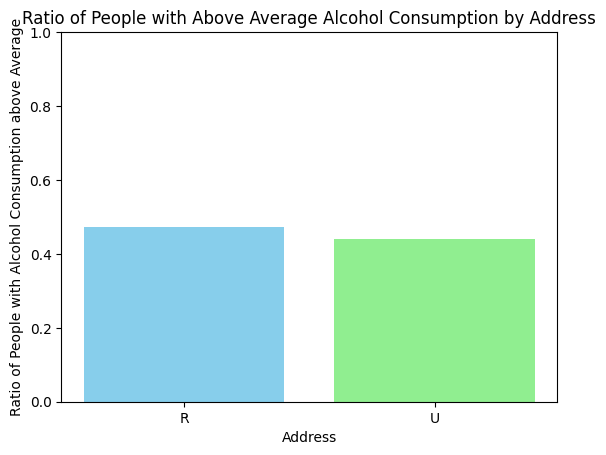

In [23]:
# 繼續比較鄉村和城市飲酒量超過總體平均的人數比
# 計算整體資料中 'Alc' 的平均值
alc_mean = df['Alc'].mean()

# 按照 'address' 分組，計算每個分組中 'Alc' 高於平均值的人數比
above_avg_counts = df[df['Alc'] > alc_mean].groupby('address')['Alc'].count()
total_counts = df.groupby('address')['Alc'].count()
ratios = above_avg_counts / total_counts

# 繪製長條圖
plt.bar(ratios.index, ratios.values, color=['skyblue', 'lightgreen'])
plt.xlabel('Address')
plt.ylabel('Ratio of People with Alcohol Consumption above Average')
plt.title('Ratio of People with Above Average Alcohol Consumption by Address')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

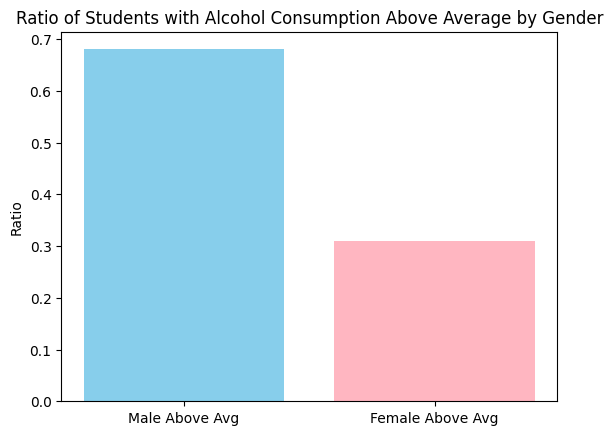

In [24]:
# 計算男生和女生中飲酒量高於整體平均的比例
male_above_avg = selected_data[(selected_data['sex'] == 'M') & (selected_data['Alc'] > df['Alc'].mean())].shape[0]
male_below_avg = selected_data[(selected_data['sex'] == 'M') & (selected_data['Alc'] < df['Alc'].mean())].shape[0]
female_above_avg = selected_data[(selected_data['sex'] == 'F') & (selected_data['Alc'] > df['Alc'].mean())].shape[0]
female_below_avg = selected_data[(selected_data['sex'] == 'F') & (selected_data['Alc'] < df['Alc'].mean())].shape[0]

male_above_avg_ratio = male_above_avg / (male_above_avg + male_below_avg)
female_above_avg_ratio = female_above_avg / (female_above_avg + female_below_avg)

# 繪製圖表
labels = ['Male Above Avg', 'Female Above Avg']
values = [male_above_avg_ratio, female_above_avg_ratio]

plt.bar(labels, values, color=['skyblue', 'lightpink'])
plt.ylabel('Ratio')
plt.title('Ratio of Students with Alcohol Consumption Above Average by Gender')
plt.show()

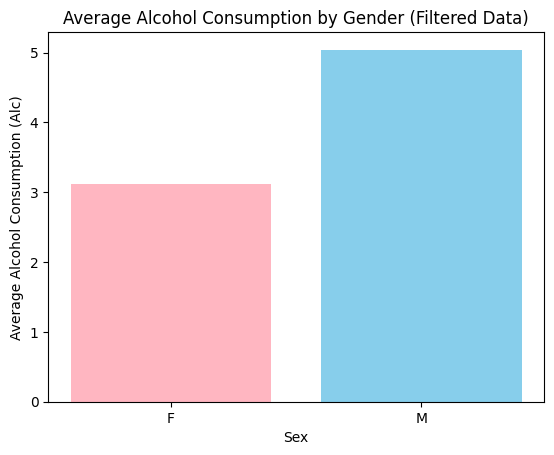

In [25]:
# 比較男女飲酒量比
# 計算男女學生的 'Alc' 平均值
grouped_data = selected_data.groupby('sex')['Alc'].mean()

# 顯示長條圖
plt.bar(grouped_data.index, grouped_data.values, color=['lightpink', 'skyblue'])
plt.xlabel('Sex')
plt.ylabel('Average Alcohol Consumption (Alc)')
plt.title('Average Alcohol Consumption by Gender (Filtered Data)')
plt.show()

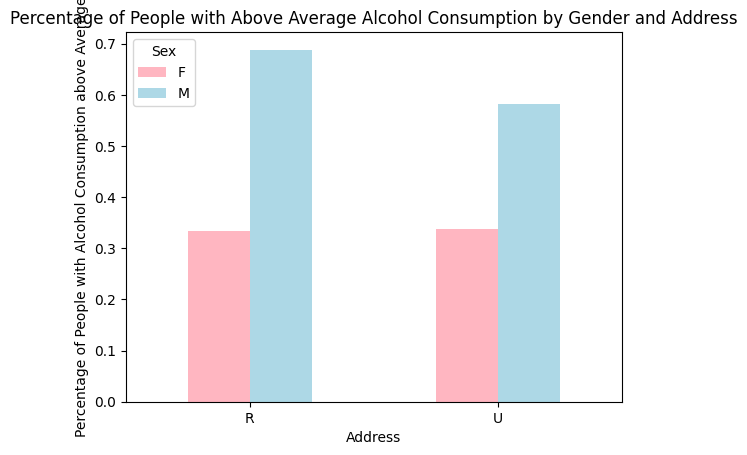

In [26]:
# 計算每個分組中高於平均值的人數
above_avg_counts = df[df['Alc'] > alc_mean].groupby(['address', 'sex'])['Alc'].count()

# 計算每個分組的總人數
total_counts = df.groupby(['address', 'sex'])['Alc'].count()

# 計算比例
above_avg_ratios = above_avg_counts / total_counts

# 將比例繪製成長條圖
above_avg_ratios.unstack().plot(kind='bar', color=['lightpink', 'lightblue'])
plt.xlabel('Address')
plt.ylabel('Percentage of People with Alcohol Consumption above Average')
plt.title('Percentage of People with Above Average Alcohol Consumption by Gender and Address')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.show()

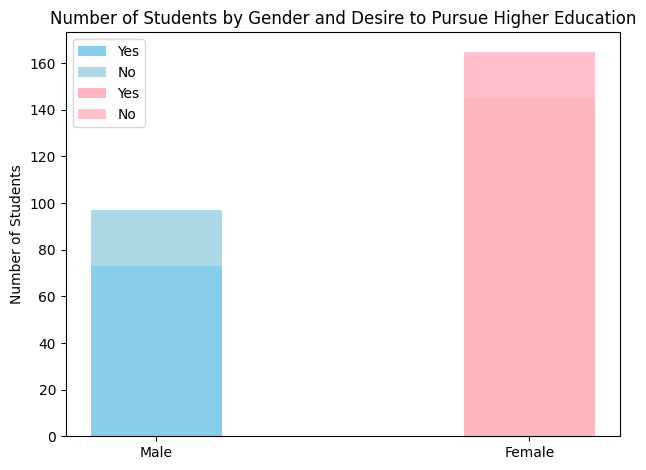

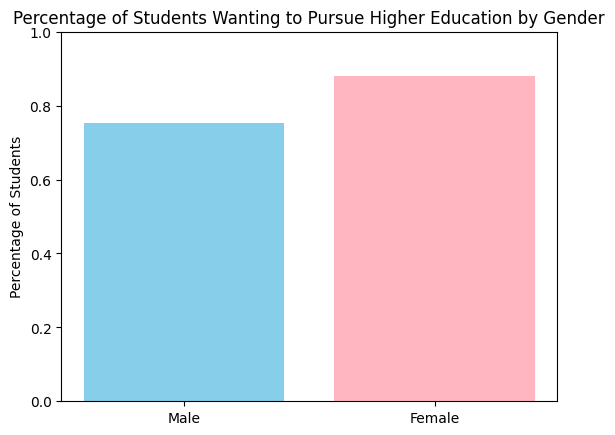

In [27]:
# 計算男生和女生中想接受高等教育的人數
male_higher_counts = selected_data[selected_data['sex'] == 'M']['higher'].value_counts()
female_higher_counts = selected_data[selected_data['sex'] == 'F']['higher'].value_counts()

# 計算男生和女生想接受和不想接受高等教育的比例
male_higher_ratio = male_higher_counts['yes'] / (male_higher_counts['yes'] + male_higher_counts['no'])
female_higher_ratio = female_higher_counts['yes'] / (female_higher_counts['yes'] + female_higher_counts['no'])

# 繪製堆疊長條圖
fig, ax = plt.subplots()
width = 0.35

# 繪製男生的長條圖
ax.bar('Male', male_higher_counts['yes'], width, label='Yes', color='skyblue')
ax.bar('Male', male_higher_counts['no'], width, label='No', color='lightblue', bottom=male_higher_counts['yes'])

# 繪製女生的長條圖
ax.bar('Female', female_higher_counts['yes'], width, label='Yes', color='lightpink')
ax.bar('Female', female_higher_counts['no'], width, label='No', color='pink', bottom=female_higher_counts['yes'])

ax.set_ylabel('Number of Students')
ax.set_title('Number of Students by Gender and Desire to Pursue Higher Education')
ax.legend()

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 計算男生和女生中想接受高等教育的比例
male_higher_ratio = male_higher_counts['yes'] / (male_higher_counts['yes'] + male_higher_counts['no'])
female_higher_ratio = female_higher_counts['yes'] / (female_higher_counts['yes'] + female_higher_counts['no'])

# 將比例製成圖表
labels = ['Male', 'Female']
ratios = [male_higher_ratio, female_higher_ratio]

plt.bar(labels, ratios, color=['skyblue', 'lightpink'])
plt.ylabel('Percentage of Students')
plt.title('Percentage of Students Wanting to Pursue Higher Education by Gender')
plt.ylim(0, 1)  
plt.show()